In [10]:
import pandas as pd
import numpy as np
from collections import OrderedDict

#считываем файл данных от Брендах
file = "2.2Beer market sales data.xlsx"
Beer_date = pd.read_excel(file, index_col=None) 


In [11]:
Brand_index = np.where(Beer_date['Brand'] != 0)
print(Brand_index)

(array([  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96,
       104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
       208, 216, 224, 232], dtype=int32),)


In [12]:

# находим ТОР 3 брендов
Brand_dict={}
for i in Brand_index[0]:
    d = [j for j in range(i, i + 8)]
    Brand_dict.update({Beer_date.at[i, 'Brand']:[{'volume': Beer_date.iloc[i, 3:], 'value': Beer_date.iloc[i+1, 3:], 'numeric-selling': Beer_date.iloc[i+2, 3:], 'weighted-selling':Beer_date.iloc[i+3, 3:], 'shop-selling': Beer_date.iloc[i+4, 3:], 'WAMP': Beer_date.iloc[i+5, 3:], 'price': Beer_date.iloc[i+6, 3:], 'daily-oftake':Beer_date.iloc[i+7, 3:] }]})
Brand_names=Brand_dict.keys()

# определяем среднее арифметическое параметра Daily oftake 0.5 L для каждого бренда
raiting = {}
for i in Brand_names:
    val = Brand_dict[i][0]['daily-oftake'].sum()/len(Brand_dict[i][0]['daily-oftake'])
    raiting.update({i:val})
convert_raiting = {}

# уопрядочиваем бренда по параметру Daily oftake 0.5 L
for key, val in raiting.items():
    convert_raiting.update({val:key})

convert_raiting = OrderedDict(sorted(convert_raiting.items(), key=lambda t: t[0]))

raiting_top = {}
for key, val in convert_raiting.items():
    raiting_top.update({val:key})

TOP_3 = []
TOP_3 = list(raiting_top.keys())[-3:]
print(TOP_3)

['Brand 15', 'Brand 8', 'Brand 3']


In [13]:
# считываем файл данных о просмотрах рекламы
file = "2.3 TV Data.xlsx"
TV_Data = pd.read_excel(file, index_col = None)
print(TV_Data.head())



     BRAND       DATE                         CHANNEL  DURATION  \
0  Brand 1 2014-06-28      РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)        10   
1  Brand 1 2014-06-28      РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)        10   
2  Brand 1 2014-06-30  ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)        10   
3  Brand 1 2014-06-30  ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)        10   
4  Brand 1 2014-06-30      РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)        10   

                      WEEK     MONTH           START TIME  Day Type  \
0  23/06/2014 - 29/06/2014  Jun 2014             19:50:55  Выходной   
1  23/06/2014 - 29/06/2014  Jun 2014             20:58:59  Выходной   
2  30/06/2014 - 06/07/2014  Jun 2014             23:56:36   Рабочий   
3  30/06/2014 - 06/07/2014  Jun 2014  1900-01-01 00:57:35   Рабочий   
4  30/06/2014 - 06/07/2014  Jun 2014             19:51:35   Рабочий   

      Week day National channel  ... Clip position Clips count  \
0      Суббота         РОССИЯ 1  ...             3           5   
1      Суббота         РОССИЯ 1  ...  

In [14]:
# получаем данных о просмотрах рекламы только для ТОП 3 брендов
tv_brand = {}
for i in TOP_3:
    tv_brand.update({i: TV_Data[TV_Data['BRAND'] == i]})
print(tv_brand)

# далее анализируем Brend 3 

{'Brand 15': Empty DataFrame
Columns: [BRAND, DATE, CHANNEL, DURATION, WEEK, MONTH, START TIME, Day Type, Week day, National channel, Programme, Programme category, Programme genre, Programme group, Clip ID, Clip type, Clip distribution, Clip first issue date, Clip position, Clips count, Clip position type, Break, Break position, Breaks count, Break type, Break distribution, Break content, TVR M 25-45 BC]
Index: []

[0 rows x 28 columns], 'Brand 8': Empty DataFrame
Columns: [BRAND, DATE, CHANNEL, DURATION, WEEK, MONTH, START TIME, Day Type, Week day, National channel, Programme, Programme category, Programme genre, Programme group, Clip ID, Clip type, Clip distribution, Clip first issue date, Clip position, Clips count, Clip position type, Break, Break position, Breaks count, Break type, Break distribution, Break content, TVR M 25-45 BC]
Index: []

[0 rows x 28 columns], 'Brand 3':          BRAND       DATE                         CHANNEL  DURATION  \
5368   Brand 3 2014-09-03  ПЕРВЫЙ 

In [15]:
# получаем массив данных каналов и доли просмотров
channel_date = tv_brand['Brand 3'].loc[:,['National channel', 'TVR M 25-45 BC']]
print(channel_date)

      National channel  TVR M 25-45 BC
5368      ПЕРВЫЙ КАНАЛ            1.81
5369      ПЕРВЫЙ КАНАЛ            1.76
5370          РОССИЯ 2            1.30
5371          РОССИЯ 2            2.66
5372          РОССИЯ 2            2.42
...                ...             ...
60728              2X2            0.69
60729     ПЕРВЫЙ КАНАЛ            1.39
60730     ПЕРВЫЙ КАНАЛ            2.99
60731     ПЕРВЫЙ КАНАЛ            2.82
60732     ПЕРВЫЙ КАНАЛ            2.58

[6779 rows x 2 columns]


In [22]:
# список каналов на которых показывали товар марки Brend 3
channels = channel_date['National channel'].unique()
print(channels)

['ПЕРВЫЙ КАНАЛ' 'РОССИЯ 2' 'РОССИЯ 1' 'НТВ' 'МАТЧ ТВ' 'ТНТ' 'ЧЕ' 'СТС'
 'ПЯТНИЦА' 'РЕН ТВ' 'ЗВЕЗДА' '2X2']


In [23]:
# суммируем общую долю показов для каждого канала
sum_tvr_by_channel = channel_date.groupby(['National channel']).sum()
print(sum_tvr_by_channel)


                  TVR M 25-45 BC
National channel                
2X2                       100.11
ЗВЕЗДА                     62.51
МАТЧ ТВ                   946.03
НТВ                        34.02
ПЕРВЫЙ КАНАЛ             1279.30
ПЯТНИЦА                   120.46
РЕН ТВ                    483.60
РОССИЯ 1                  585.75
РОССИЯ 2                  189.63
СТС                       338.34
ТНТ                       474.75
ЧЕ                        150.22


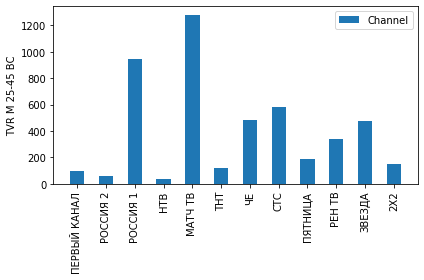

In [24]:
# на холсте отображаем гистограмму доли показов по каждому каналу
import matplotlib.pyplot as plt

width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar(channels, sum_tvr_by_channel['TVR M 25-45 BC'], width, label='Channel')
plt.xticks(rotation=90)
ax.set_ylabel('TVR M 25-45 BC')
ax.legend()

fig.tight_layout()
plt.show()


In [25]:
#Получаем данные о доле просмотров видеороликов оп бренду Brand 3
brand_view_date = tv_brand['Brand 3'].loc[:,['DATE', 'TVR M 25-45 BC']]
print(brand_view_date)

            DATE  TVR M 25-45 BC
5368  2014-09-03            1.81
5369  2014-09-03            1.76
5370  2014-09-08            1.30
5371  2014-09-08            2.66
5372  2014-09-08            2.42
...          ...             ...
60728 2016-08-31            0.69
60729 2016-09-06            1.39
60730 2016-09-06            2.99
60731 2016-09-06            2.82
60732 2016-09-06            2.58

[6779 rows x 2 columns]


In [27]:
# вычисляем суммарное число просмотров рекламы в год
total_count_show_of_years = brand_view_date.set_index("DATE").groupby(pd.Grouper(freq='Y')).count()
print(total_count_show_of_years)

            TVR M 25-45 BC
DATE                      
2014-12-31             221
2015-12-31             426
2016-12-31            6132


In [28]:
years =  brand_view_date['DATE'].dt.year.unique()
print(years)

[2014 2015 2016]


            TVR M 25-45 BC
DATE                      
2014-12-31           73.36
2015-12-31          266.52
2016-12-31         4424.84


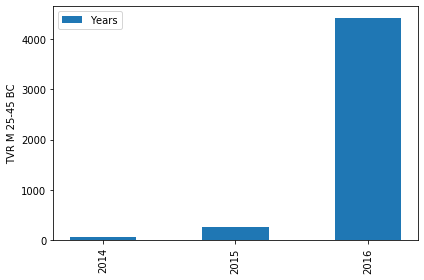

In [29]:
# строим гистограмму, которая отображает число просмотров видео по годам
total_sum_watch_of_years = brand_view_date.set_index("DATE").groupby(pd.Grouper(freq='Y')).sum()
print(total_sum_watch_of_years)

width = 0.5
fig, ax = plt.subplots()
rects1 = ax.bar([str(i) for i in years], total_sum_watch_of_years['TVR M 25-45 BC'], width, label='Years')
plt.xticks(rotation=90)
ax.set_ylabel('TVR M 25-45 BC')
ax.legend()

fig.tight_layout()
plt.show()

In [136]:
brand_view = tv_brand['Brand 3'].loc[:,[ 'DATE', 'DURATION','TVR M 25-45 BC']]
print(brand_view)


            DATE  DURATION  TVR M 25-45 BC
5368  2014-09-03        30            1.81
5369  2014-09-03        30            1.76
5370  2014-09-08        30            1.30
5371  2014-09-08        30            2.66
5372  2014-09-08        30            2.42
...          ...       ...             ...
60728 2016-08-31        15            0.69
60729 2016-09-06        30            1.39
60730 2016-09-06        30            2.99
60731 2016-09-06        30            2.82
60732 2016-09-06        30            2.58

[6779 rows x 3 columns]


In [138]:
# получаем средние значения за месяцы для всего периода 

brand_view_mounth = brand_view.set_index("DATE").groupby(pd.Grouper(freq='M')).sum()
count = brand_view.set_index("DATE").groupby(pd.Grouper(freq='M')).count()
brand_view_arg = brand_view_mounth/count

# преобразуем индексную колонку для склейки с другими таблицами
date = brand_view_arg.index
brand_view_arg['mounth_years'] = date.strftime("%b %Y")
brand_view_arg = brand_view_arg.set_index('mounth_years')


print(brand_view_arg)

               DURATION  TVR M 25-45 BC
mounth_years                           
Sep 2014      12.000000        0.390000
Oct 2014      11.739130        0.360000
Nov 2014      12.127660        0.351064
Dec 2014      10.000000        0.191556
Jan 2015      10.000000        0.210152
Feb 2015      10.000000        0.183922
Mar 2015      11.684211        0.356842
Apr 2015      19.180328        0.824262
May 2015      30.000000        0.997333
Jun 2015      30.000000        1.886667
Jul 2015      30.000000        1.750000
Aug 2015      10.000000        0.306667
Sep 2015      12.857143        0.811429
Oct 2015      27.187500        1.138750
Nov 2015      41.250000        1.804167
Dec 2015      35.000000        0.365000
Jan 2016      10.645161        0.361613
Feb 2016      15.000000        0.507308
Mar 2016      16.200000        0.987400
Apr 2016      15.000000        1.313125
May 2016      23.851351        0.714986
Jun 2016      15.821794        0.986761
Jul 2016      12.297297        4.639730


In [79]:
price = Brand_dict['Brand 3'][0]['price']
price = price.rename_axis('mounth_years')
price.rename('price')

print(price)

mounth_years
Aug 2014    78.7141
Sep 2014    78.9193
Oct 2014    80.4305
Nov 2014    81.3292
Dec 2014    79.5041
Jan 2015    82.0592
Feb 2015    81.1735
Mar 2015    82.7271
Apr 2015    85.3002
May 2015     85.641
Jun 2015    88.9878
Jul 2015     92.365
Aug 2015    90.9343
Sep 2015    89.8114
Oct 2015    90.5611
Nov 2015    90.6418
Dec 2015    88.2586
Jan 2016    89.8874
Feb 2016    90.2381
Mar 2016    89.3913
Apr 2016    89.8736
May 2016    91.0946
Jun 2016     91.411
Jul 2016    91.7092
Aug 2016    90.3779
Name: 6, dtype: object


In [89]:
offtake = Brand_dict['Brand 3'][0]['daily-oftake']
offtake = offtake.rename_axis('mounth_years')
offtake.rename('offtake')

print(offtake)

mounth_years
Aug 2014    72.6101
Sep 2014    59.8276
Oct 2014    55.8795
Nov 2014    51.2626
Dec 2014    55.2617
Jan 2015    51.0652
Feb 2015    49.4928
Mar 2015    53.8622
Apr 2015    49.7458
May 2015    56.4939
Jun 2015    53.0664
Jul 2015    47.5086
Aug 2015    47.9814
Sep 2015     44.804
Oct 2015    41.4576
Nov 2015    38.5128
Dec 2015     42.649
Jan 2016    37.5594
Feb 2016    34.6691
Mar 2016    39.6907
Apr 2016    39.4123
May 2016    43.6517
Jun 2016    44.4825
Jul 2016    47.8969
Aug 2016    48.8099
Name: 7, dtype: object


In [90]:
# получаем итогвую таблицу для линейной регрессии
common_table = brand_view_arg.merge(price, on='mounth_years').rename(columns={6:'price'}).merge(offtake, on='mounth_years').rename(columns={7:'offtake'})
print(common_table)

               DURATION  TVR M 25-45 BC    price  offtake
mounth_years                                             
Sep 2014      12.000000        0.390000  78.9193  59.8276
Oct 2014      11.739130        0.360000  80.4305  55.8795
Nov 2014      12.127660        0.351064  81.3292  51.2626
Dec 2014      10.000000        0.191556  79.5041  55.2617
Jan 2015      10.000000        0.210152  82.0592  51.0652
Feb 2015      10.000000        0.183922  81.1735  49.4928
Mar 2015      11.684211        0.356842  82.7271  53.8622
Apr 2015      19.180328        0.824262  85.3002  49.7458
May 2015      30.000000        0.997333   85.641  56.4939
Jun 2015      30.000000        1.886667  88.9878  53.0664
Jul 2015      30.000000        1.750000   92.365  47.5086
Aug 2015      10.000000        0.306667  90.9343  47.9814
Sep 2015      12.857143        0.811429  89.8114   44.804
Oct 2015      27.187500        1.138750  90.5611  41.4576
Nov 2015      41.250000        1.804167  90.6418  38.5128
Dec 2015      

In [139]:
# строим регрессионную модель
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit( common_table[['DURATION','TVR M 25-45 BC','price']],common_table['offtake'])

LinearRegression()

In [140]:
# получаем параметры модели
clf.coef_  

array([ 0.06660595,  1.97106935, -1.33022141])

In [141]:
clf.intercept_

160.25492661466856